In [23]:
import os
from pathlib import Path
import importlib
d = os.getcwd()
if d.endswith('testing'):
    d = os.path.split(d)[0]
    os.chdir(d)
    print(d)

In [21]:


import modules.helperFunctions.packDict as packDict
# from modules.helperFunctions.packDict import unpackDict
# from modules.helperFunctions.updateDict import updateDict
importlib.reload(packDict)
# d1 = unpackDict({'a':{'b':None},'b':[{'a':None},{'d':None}]})
# structure = {'configFiles':{'siteID':['siteConfiguration.yml',{'dataSourceID':'dataSourceConfiguration.yml'}]}}
structure = {'configFiles':{'siteID':{'':['siteConfiguration.yml'],'dataSourceID':['dataSourceConfiguration.yml']}}}

lout = []
for key,value in packDict.unpackDict(structure).items():
    if type(value) is not list:
        value = [value]
    for v in value:
        lout.append(os.path.join(key,v))
packDict.unpackDict(packDict.packDict(lout))

{'configFiles\\siteID\\siteConfiguration.yml': None,
 'configFiles\\siteID\\dataSourceID\\dataSourceConfiguration.yml': None}

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = r"C:\Users\User\GSC_Work\SCL_2025\20250910_decompressed\TOA5_57840_Flux_CSFormat_24_2025_08_06_2030.dat"
# f = r"C:\Users\User\GSC_Work\SCL_2025\20250910_decompressed2\TOA5_57840_Flux_CSFormat_24_2025_08_08_1400.dat"
df = pd.read_csv(f,skiprows=[0],header=[0,1,2])
# (df['FCH4_mass','ngCH4 m-2 s-1'].astype(float)*1e-6*3600).median()
cols = df.columns
df.columns = [c[0] for c in cols]
df.index = pd.to_datetime(df['TIMESTAMP'])
df = df.drop(['TIMESTAMP','FP_EQUATION'],axis=1)
df = df.astype(float)
df.loc[((df['USTAR']<.15)|(df['FC_QC']>4)|(df['FCH4_samples']<17500)|(df['CO2_sig_strgth_Min']<.95)),['FCH4_mass','FC_mass']]=np.nan
# df.loc[,['FCH4_mass','FC_mass']]=np.nan
df['FCH4'] = df['FCH4_mass']/16
df['FCH4_mass'] *= 1e-6*3600
df['FC_mass'] *= 1e-3*3600
# df['CH4_density'] *= 16.04
# df.loc[df]
# df['']
fig,ax=plt.subplots(2)
df['FCH4_mass'].plot(ax=ax[0])
df['FCH4'].plot(ax=ax[1])
df[['FCH4_mass','FCH4','FCH4_samples']].describe()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\GSC_Work\\SCL_2025\\20250910_decompressed\\TOA5_57840_Flux_CSFormat_24_2025_08_06_2030.dat'

np.float64(21.375030074399998)

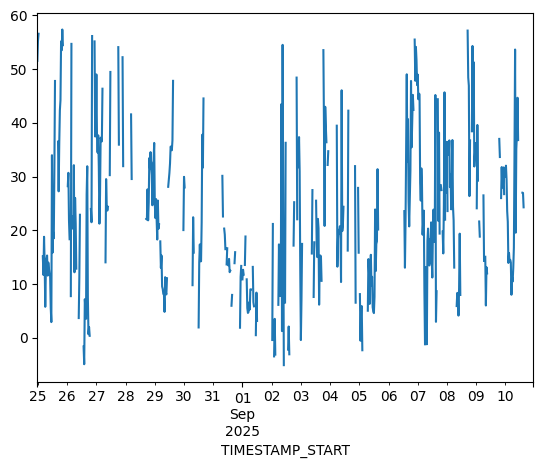

In [ ]:
df = pd.read_csv(r'C:\Users\User\GSC_Work\SCL_2025\20250910\57840_Flux_AmeriFluxFormat_13.dat')
df.index = pd.to_datetime(df['TIMESTAMP_START'],format='%Y%m%d%H%M')
# df['TIMESTAMP_START']
df['FCH4']=df['FCH4'].astype('float')
df['FCH4_SSITC_TEST']=df['FCH4_SSITC_TEST'].astype('float')
df.loc[((df['FCH4_SSITC_TEST']>1)|(df['FCH4']>1000)|(df['FCH4']<-100)),'FCH4']=np.nan
df['FCH4']*=16.04*1e-6*3600
df['FCH4'].plot()
df['FCH4'].median()
# df['CO2_sig_strgth_Min'].describe()

In [ ]:
import shutil
import modules.databaseSetup.configurations as configurations
importlib.reload(configurations)

projectPath=os.path.join(d,'testing','outputs','testProject')
shutil.rmtree(projectPath, ignore_errors=True)

pc = configurations.template(projectPath=projectPath)
# packDict.unpackDict(pc.structure)

Running: <class 'modules.databaseSetup.configurations.template'>

Saving: c:\Users\User\GSC_Work\EC_processing\testing\outputs\testProject\projectConfiguration.yml

{'startDate': {'datatype': 'datetime', 'description': 'Date of installation. For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'endDate': {'datatype': 'datetime', 'description': 'Date of removal (or None). For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'latitude': {'datatype': 'float', 'description': 'Latitude (WGS1984) Stored in decimal degrees.  Will parse input from other common format. For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'longitude': {'datatype': 'float', 'description': 'Longitude (WGS1984) Stored in decimal degrees.  Will parse input from other common format. For nested values, assumed to be same as parent object.

In [ ]:
class tst:
    def __init__(self):
        self.b = 'a'
        P = os.path.join('a','self.b','c')
        for p in p.split(os.path.sep)


['a', 'b', 'c']

In [ ]:
from dataclasses import dataclass,field

@dataclass(kw_only=True)
class base:
    a: str = field(default='a',repr=True)
    b: bool = True

    def __post_init__(self):
        if self.b:
            self.__dataclass_fields__['a'].repr = False
        else:
            self.__dataclass_fields__['a'].repr = True


@dataclass(kw_only=True)
class pace(base):
    b: bool = True

@dataclass(kw_only=True)
class space(pace):
    b: bool = False


x = pace()
x = space()
print(x.__dataclass_fields__['a'].repr)
print(x)


True
space(a='a', b=False)


In [ ]:
# Source - https://stackoverflow.com/a/59987363
# Posted by bruno desthuilliers, modified by community. See post 'Timeline' for change history
# Retrieved 2026-01-08, License - CC BY-SA 4.0

class Base(object):
    def __post_init__(self):
        # just intercept the __post_init__ calls so they
        # aren't relayed to `object`
        pass

@dataclass
class NamedObj(Base):
    name: str

    def __post_init__(self):
        super().__post_init__()
        print("NamedObj __post_init__")
        self.name = "Name: " + self.name

@dataclass
class NumberedObj(Base):
    number: int = 0

    def __post_init__(self):
        super().__post_init__()
        print("NumberedObj __post_init__")
        self.number += 1

@dataclass
class NamedAndNumbered(NumberedObj, NamedObj):

    def __post_init__(self):
        super().__post_init__()
        print("NamedAndNumbered __post_init__")
        

NamedAndNumbered(name='c')

NamedObj __post_init__
NumberedObj __post_init__
NamedAndNumbered __post_init__


NamedAndNumbered(name='Name: c', number=1)

In [ ]:
from dataclasses import dataclass,field

@dataclass
class k:
    a: int = 1

x = [k()*3]
x

In [222]:
import modules.database.dbDump as dbDump
import matplotlib.pyplot as plt
# import importlib
importlib.reload(dbDump)

# os.getcwd()
# os.path.abspath(r'testing\outputs\myProject')
db = dbDump.database(projectPath="testing/outputs/myProject",siteID='SCL',stageID='EasyFlux_2025',verbose=False)
dbYear = db.readDbYear(2025)
dbYear.columns
# plt.figure()
# plt.plot(dbYear.index,dbYear['AirTC_Avg'])


Index(['POSIX_Time_int64', 'clean_tv', 'air_mass_coeff', 'ALB', 'Bowen_ratio',
       'CH4_density', 'CH4_density_SIGMA', 'CH4_sig_strgth_Min', 'CO2_density',
       'CO2_density_SIGMA', 'CO2_sig_strgth_Min', 'daytime', 'e', 'ET',
       'ET_QC', 'ET_samples', 'e_amb', 'e_probe', 'e_sat', 'e_sat_amb',
       'e_sat_probe', 'FCH4_mass', 'FCH4_samples', 'FC_mass', 'FC_QC',
       'FC_samples', 'FETCH_70', 'FETCH_80', 'FETCH_90', 'FETCH_FILTER',
       'FETCH_INTRST', 'FETCH_MAX', 'FP_FETCH_INTRST', 'H', 'H2O_density',
       'H2O_density_probe', 'H2O_density_SIGMA', 'H2O_sig_strgth_Min',
       'hour_angle', 'H_QC', 'H_samples', 'LE', 'LE_QC', 'LE_samples',
       'LI7700_amb_press', 'LI7700_amb_tmpr', 'LW_IN', 'LW_OUT', 'NETRAD',
       'PA', 'PPFD_IN', 'RH_1_1_1', 'RH_1_1_2', 'RH_1_1_3', 'sonic_azimuth',
       'sun_azimuth', 'sun_declination', 'sun_elevation', 'SW_IN', 'SW_OUT',
       'TAU', 'TAU_QC', 'TA_1_1_1', 'TA_1_1_2', 'TA_1_1_3', 'TKE', 'TSTAR',
       'T_DP_1_1_1', 'T_DP_1_1_

In [289]:
dbYear = dbYear.loc[((dbYear['daytime'].isna()==False)&(dbYear.index.month>=8))].copy()
dbYear['CO2_sig_strgth_Min'].describe()

count    2548.000000
mean        0.932644
std         0.096874
min         0.313210
25%         0.933012
50%         0.962116
75%         0.991057
max         1.003409
Name: CO2_sig_strgth_Min, dtype: float64

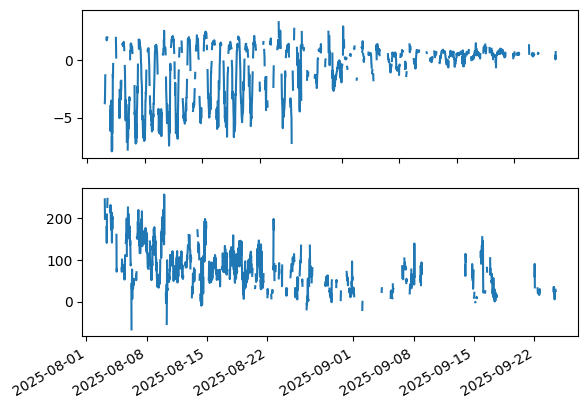

In [ ]:
def filt(df,flux):
    df.loc[df[f'{flux}_samples']/18000<.99,f'{flux}_mass']=np.nan
    if f'{flux}_QC' in df.columns:
        df.loc[df[f'{flux}_QC']>3,f'{flux}_mass']=np.nan
    df.loc[((df[f'{flux}_mass'].mean()-df[f'{flux}_mass'])/df[f'{flux}_mass'].std()).abs()>3,f'{flux}_mass']=np.nan
    df.loc[df['CO2_sig_strgth_Min']<.9,f'{flux}_mass']=np.nan
    return(df)


def LUT(df,flux):
    print(df[flux].isna().sum())
    df['HR'] = df.index.hour
    HR = df[[flux,'HR']].groupby('HR').median()
    for i,row in df.iterrows():
        if np.isnan(row[flux]):
            df.loc[df.index==i,flux] = HR.loc[i.hour].values[0]
    return(df)

db = dbYear.copy()

for flux in ['FC','FCH4']:
    db = filt(db,flux)


db['FC']=db['FC_mass']/44.01*1e3#*1800*48*1e-3 # g m-2 d-1*1800*48*1e-3 # g m-2 d-1
db['FCH4']=db['FCH4_mass']/16.04*1e-1#*1800*48*1e-9 # g m-2 d-1*1800*48*1e-9 # g m-2 d-1


db.loc[db['FC'].isna(),'FCH4']=np.nan


# db = LUT(db,'FC')
# db = LUT(db,'FCH4')
# db = LUT(db,'LE')


fig,ax=plt.subplots(2)

db['Hour'] = db.index.hour
ax[0].plot(db['FC'])
ax[1].plot(db['FCH4'])

fig.autofmt_xdate()

m = db[['FC','FCH4','LE']].mean()
m

db[['co2_flux','ch4_flux']] = db[['FC','FCH4']]

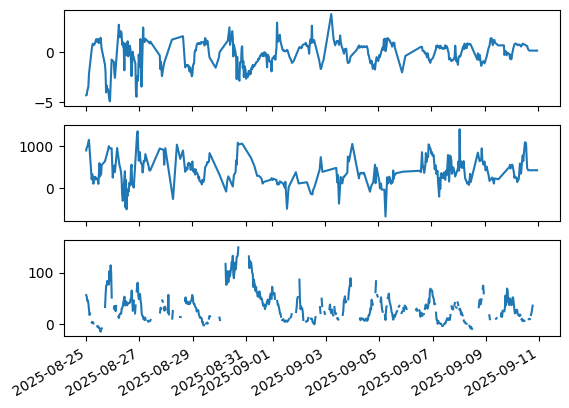

In [266]:
import pandas as pd
df = pd.read_csv(r'U:\data-dump\SCL\2025\20250910\57840_Flux_AmeriFluxFormat_13.dat',na_values="NAN")
df.index=pd.to_datetime(df['TIMESTAMP_END'],format='%Y%m%d%H%M')
# df.loc[df['u']]
df.loc[df['USTAR']<.1,['FC','FCH4']]=np.nan
# print(df['FC_SSITC_TEST'].describe())

for flux in ['FC','FCH4','LE']:
    df.loc[df[f'{flux}_SSITC_TEST']>0,flux]=np.nan
    df.loc[((df[flux].mean()-df[flux])/df[flux].std()).abs()>3,flux]=np.nan

# df = LUT(df,'FC')
# df = LUT(df,'FCH4')
# df = LUT(df,'LE')

fig,ax=plt.subplots(3)
df['FC'] = (df['FC']).interpolate()
df['FCH4'] = (df['FCH4']).interpolate()
ax[0].plot(df['FC'])
ax[1].plot(df['FCH4'])
ax[2].plot(df['LE'])
df[['FC','FCH4','LE']].mean()

fig.autofmt_xdate()

74.916 1.23
-1.476 0.116
35.142 1.2


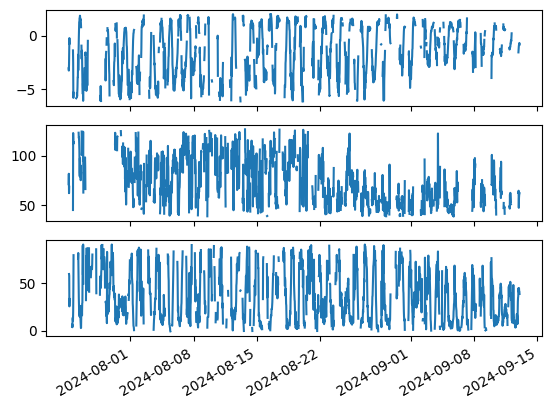

In [287]:
df = pd.read_csv(r"C:\Users\jskeeter\OneDrive - NRCan RNCan\Documents\Presentations\CANCH4\Data\eddypro_t_full_output_2025-05-02T224906_exp.csv",
                 skiprows=[0,2],header=[0],na_values=-9999)#,parse_dates={'datetime':['date','time']})
df.index=pd.to_datetime(df['date']+' '+df['time'])#df['datetime']
# df['ch4_flux'].describe()
df.loc[df['qc_ch4_flux']>1,'ch4_flux'] = np.nan
df.loc[df['u*']<.1,'ch4_flux'] = np.nan
df.loc[df['diag_77_mean']<20,'ch4_flux'] = np.nan
df.loc[((df['ch4_flux'].mean()-df['ch4_flux'])/df['ch4_flux'].std()).abs()>1,'ch4_flux']=np.nan

df.loc[df['qc_co2_flux']>1,'co2_flux'] = np.nan
df.loc[df['u*']<.1,'co2_flux'] = np.nan
df.loc[df['diag_77_mean']<20,'co2_flux'] = np.nan
df.loc[((df['co2_flux'].mean()-df['co2_flux'])/df['co2_flux'].std()).abs()>1,'co2_flux']=np.nan


df.loc[df['qc_LE']>1,'LE'] = np.nan
df.loc[df['u*']<.1,'LE'] = np.nan
df.loc[((df['LE'].mean()-df['LE'])/df['LE'].std()).abs()>1,'LE']=np.nan


df['ch4_flux']=df['ch4_flux']*1e3

# def LUT(df,flux):
#     print(df[flux].isna().sum())
#     df['HR'] = df.index.hour
#     HR = df[[flux,'HR']].groupby('HR').median()
#     for i,row in df.iterrows():
#         if np.isnan(row[flux]):
#             df.loc[df.index==i,flux] = HR.loc[i.hour].values[0]
#     return(df)
# for flux in ['co2_flux','LE','ch4_flux']:
#     df=LUT(df,flux)
# df = LUT(df,'co2_flux')
# df = LUT(df,'ch4_flux')

fig,ax=plt.subplots(3)
ax[0].plot(df['co2_flux'])
ax[1].plot(df['ch4_flux'])
ax[2].plot(df['LE'])

for flux in ['ch4_flux','co2_flux','LE']:
    print(df[flux].mean().round(3),(1.96*df[flux].std()/df[flux].count()**.5).round(3))


    
fig.autofmt_xdate()


In [164]:
df['co2_flux'].groupby(df['co2_flux'].index.hour).mean()
# df

datetime
0    -4.990442
1    -5.694678
2    -5.337253
3    -3.734846
4    -2.213050
5    -1.190013
6     0.622988
7     1.025097
8    -0.687046
9     0.477575
10    1.345633
11    1.221469
12    3.326868
13    1.393379
14    0.504601
15    0.428277
16   -0.590898
17   -3.823560
18   -3.891364
19   -3.816952
20   -4.231988
21   -6.104134
22   -5.126951
23   -4.905207
Name: co2_flux, dtype: float64

In [285]:
full = pd.concat([df[['ch4_flux','co2_flux','LE']],db[['ch4_flux','co2_flux','LE']]])

for flux in ['ch4_flux','co2_flux','LE']:
    print(flux,full[flux].mean().round(3),full[flux].std())#(1.96*df[flux].std()/(df[flux].count()**.5)).round(3))

def LUT(df,flux):
    print(df[flux].isna().sum())
    df['HR'] = df.index.hour
    df['M'] = df.index.month
    HR = df[[flux,'HR','M']].groupby(['HR','M']).median()
    # print(HR.loc[1,8])
    for i,row in df.iterrows():
        if np.isnan(row[flux]):
            df.loc[df.index==i,flux] = HR.loc[i.hour,i.month].values[0]
    return(df)

full = LUT(full,'ch4_flux')
full = LUT(full,'co2_flux')
full = LUT(full,'LE')

print('LUT')


for flux in ['ch4_flux','co2_flux','LE']:
    print(flux,full[flux].mean().round(3),full[flux].std())


# 
# plt.errorbar(full.groupby(full.index.dayofyear).mean()['co2_flux'].index,full.groupby(full.index.dayofyear).mean()['co2_flux'],yerr=full.groupby(full.index.dayofyear).std()['co2_flux']/full.groupby(full.index.dayofyear).count()['co2_flux']**.5)


ch4_flux 77.003 37.46898100708821
co2_flux -1.357 2.8462201616985308
LE 32.061 30.59428169043803
2686
1581
911
LUT
ch4_flux 68.954 30.918606699425016
co2_flux -1.136 2.6286688295861524
LE 31.886 29.628113113018685


In [283]:
(68.954)*16.04*1e-6*1800*48

95.56031462399997